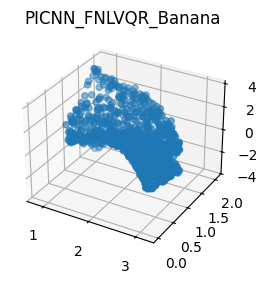

In [28]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import PICNN_FNLVQR_Banana

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = PICNN_FNLVQR_Banana(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], Y[:, 0], Y[:, 1])
ax.set_title("PICNN_FNLVQR_Banana")

plt.show()

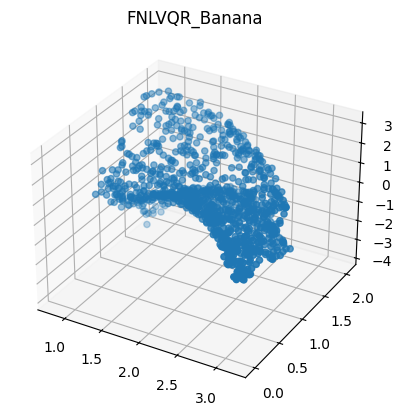

In [29]:
%matplotlib inline
from datasets import FNLVQR_Banana

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Banana(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], Y[:, 0], Y[:, 1],)
ax.set_title("FNLVQR_Banana")
plt.show()

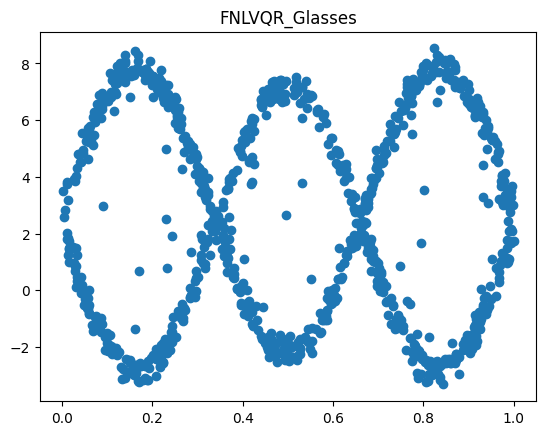

In [30]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import PICNN_FNLVQR_Glasses

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = PICNN_FNLVQR_Glasses(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

plt.scatter(X[:, 0], Y[:, 0])
plt.title("FNLVQR_Glasses")
plt.show()

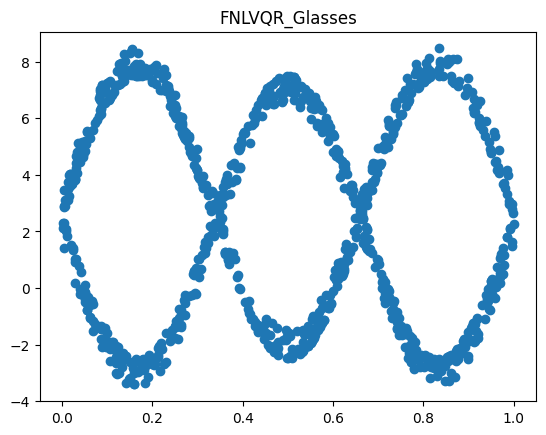

In [31]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import FNLVQR_Glasses

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Glasses(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

plt.scatter(X[:, 0], Y[:, 0])
plt.title("FNLVQR_Glasses")
plt.show()

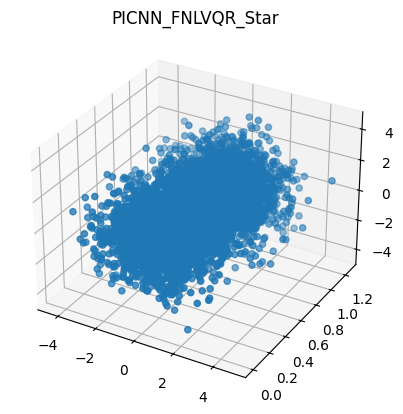

In [32]:
%matplotlib inline
from datasets import PICNN_FNLVQR_Star

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = PICNN_FNLVQR_Star(tensor_parameters=tensor_parameters, amplitude=1)
X, Y = dataset.sample_joint(n_points=5000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Y[:, 0], X[:, 0], Y[:, 1])
ax.set_title("PICNN_FNLVQR_Star")
plt.show()

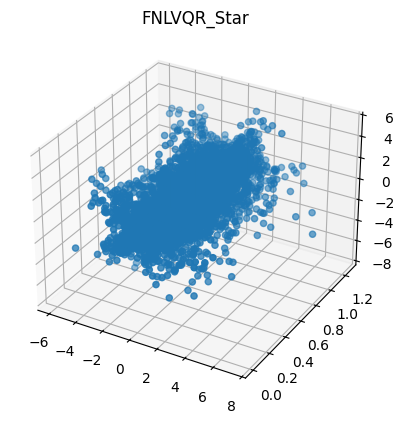

In [33]:
%matplotlib inline
from datasets import FNLVQR_Star

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Star(tensor_parameters=tensor_parameters, amplitude=1)
X, Y = dataset.sample_joint(n_points=5000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Y[:, 0], X[:, 0], Y[:, 1])
ax.set_title("FNLVQR_Star")
plt.show()

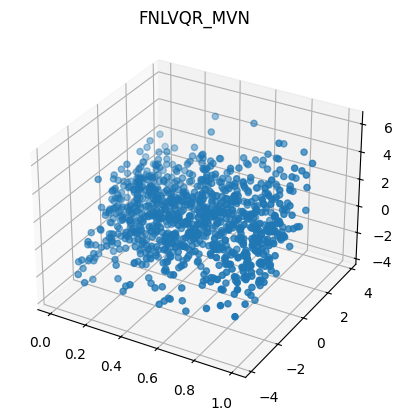

In [34]:
%matplotlib inline
from datasets import FNLVQR_MVN

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_MVN(number_of_responses=2, number_of_features=1, tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], Y[:, 0], Y[:, 1])
ax.set_title("FNLVQR_MVN")
plt.show()